In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
mnist=keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [6]:
RESHAPED=784
X_train=X_train.reshape(60000,RESHAPED)
X_test=X_test.reshape(10000,RESHAPED)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')


X_train/=255
X_test/=255

print(X_train.shape[0],"train samples")
print(X_test.shape[0],"test samples")


Y_train=tf.keras.utils.to_categorical(Y_train,10)
Y_test=tf.keras.utils.to_categorical(Y_test,10)

60000 train samples
10000 test samples


In [7]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0=Sequential()
model_0.add(Dense(10,input_shape=(784,),name="dense_layer",activation="softmax"))

In [8]:
model_0.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
training=model_0.fit(X_train,Y_train,batch_size=64,epochs=70,validation_split=0.2)

Epoch 1/70
750/750 [==============================] - 2s 3ms/step - loss: 1.0891 - accuracy: 0.7464 - val_loss: 0.6576 - val_accuracy: 0.8567
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6089 - accuracy: 0.8550 - val_loss: 0.5095 - val_accuracy: 0.8758
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5133 - accuracy: 0.8705 - val_loss: 0.4512 - val_accuracy: 0.8871
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4668 - accuracy: 0.8791 - val_loss: 0.4187 - val_accuracy: 0.8920
Epoch 5/70
750/750 [==============================] - 2s 3ms/step - loss: 0.4382 - accuracy: 0.8840 - val_loss: 0.3978 - val_accuracy: 0.8963
Epoch 6/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4183 - accuracy: 0.8878 - val_loss: 0.3825 - val_accuracy: 0.8984
Epoch 7/70
750/750 [==============================] - 3s 4ms/step - loss: 0.4034 - accuracy: 0.8907 - val_loss: 0.3710 - val_accuracy: 0.9007
Epoch 

750/750 [==============================] - 4s 5ms/step - loss: 0.2914 - accuracy: 0.9187 - val_loss: 0.2847 - val_accuracy: 0.9212
Epoch 59/70
750/750 [==============================] - 3s 4ms/step - loss: 0.2909 - accuracy: 0.9190 - val_loss: 0.2843 - val_accuracy: 0.9213
Epoch 60/70
750/750 [==============================] - 3s 4ms/step - loss: 0.2903 - accuracy: 0.9191 - val_loss: 0.2839 - val_accuracy: 0.9213
Epoch 61/70
750/750 [==============================] - 3s 4ms/step - loss: 0.2899 - accuracy: 0.9192 - val_loss: 0.2835 - val_accuracy: 0.9209
Epoch 62/70
750/750 [==============================] - 4s 5ms/step - loss: 0.2894 - accuracy: 0.9193 - val_loss: 0.2835 - val_accuracy: 0.9212
Epoch 63/70
750/750 [==============================] - 4s 5ms/step - loss: 0.2889 - accuracy: 0.9193 - val_loss: 0.2830 - val_accuracy: 0.9221
Epoch 64/70
750/750 [==============================] - 4s 5ms/step - loss: 0.2885 - accuracy: 0.9197 - val_loss: 0.2827 - val_accuracy: 0.9213
Epoch 65/70

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


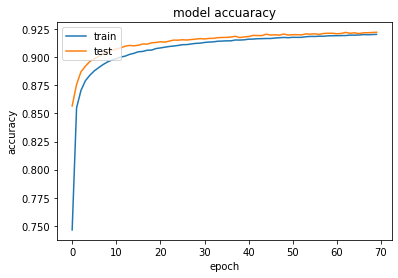

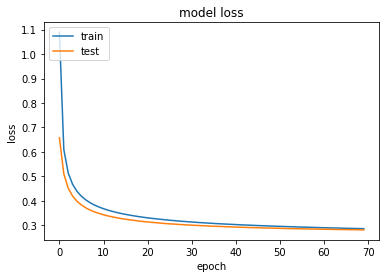

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history["accuracy"])
plt.plot(training.history["val_accuracy"])
plt.title("model accuaracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.title("model loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()



In [12]:
test_loss,test_acc=model_0.evaluate(X_test,Y_test)
print("test accuracy",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2823 - accuracy: 0.9211
test accuracy 0.9211000204086304


In [13]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_0.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [15]:
model_1=Sequential()
N_hidden=64
model_1.add(Dense(N_hidden,input_shape=(784,),name="dense_layer_1",activation="relu"))
model_1.add(Dense(N_hidden,input_shape=(784,),name="dense_layer_2",activation="relu"))
model_1.add(Dense(10,input_shape=(784,),name="dense_layer_3",activation="softmax"))

In [16]:
model_1.compile(optimizer='SGD',loss="categorical_crossentropy",metrics=['accuracy'])

In [17]:
training=model_1.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2)

Epoch 1/100
750/750 [==============================] - 5s 6ms/step - loss: 1.0904 - accuracy: 0.7066 - val_loss: 0.4839 - val_accuracy: 0.8733
Epoch 2/100
750/750 [==============================] - 4s 6ms/step - loss: 0.4364 - accuracy: 0.8779 - val_loss: 0.3570 - val_accuracy: 0.8997
Epoch 3/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3587 - accuracy: 0.8973 - val_loss: 0.3123 - val_accuracy: 0.9106
Epoch 4/100
750/750 [==============================] - 4s 6ms/step - loss: 0.3217 - accuracy: 0.9070 - val_loss: 0.2905 - val_accuracy: 0.9162
Epoch 5/100
750/750 [==============================] - 5s 6ms/step - loss: 0.2969 - accuracy: 0.9145 - val_loss: 0.2699 - val_accuracy: 0.9218
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.2763 - accuracy: 0.9206 - val_loss: 0.2548 - val_accuracy: 0.9259
Epoch 7/100
750/750 [==============================] - 4s 6ms/step - loss: 0.2598 - accuracy: 0.9262 - val_loss: 0.2387 - val_accuracy: 0.9326

Epoch 58/100
750/750 [==============================] - 3s 3ms/step - loss: 0.0554 - accuracy: 0.9851 - val_loss: 0.1013 - val_accuracy: 0.9720
Epoch 59/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0545 - accuracy: 0.9855 - val_loss: 0.1033 - val_accuracy: 0.9714
Epoch 60/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0533 - accuracy: 0.9858 - val_loss: 0.1010 - val_accuracy: 0.9717
Epoch 61/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0521 - accuracy: 0.9860 - val_loss: 0.1027 - val_accuracy: 0.9715
Epoch 62/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0514 - accuracy: 0.9861 - val_loss: 0.1009 - val_accuracy: 0.9711
Epoch 63/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0502 - accuracy: 0.9866 - val_loss: 0.1023 - val_accuracy: 0.9708
Epoch 64/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9875 - val_loss: 0.1009 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


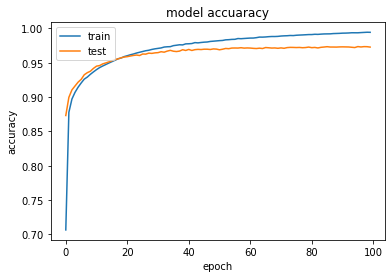

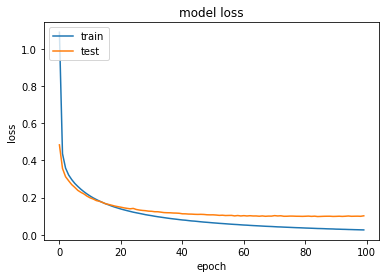

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history["accuracy"])
plt.plot(training.history["val_accuracy"])
plt.title("model accuaracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.title("model loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [20]:
test_loss,test_acc=model_1.evaluate(X_test,Y_test)
print("test accuracy",test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0926 - accuracy: 0.9748
test accuracy 0.9747999906539917


In [21]:
model_1.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001432713E5E0>>

In [22]:
model_1.weights

[<tf.Variable 'dense_layer_1/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.01596418,  0.0550211 , -0.00643941, ..., -0.03942831,
         -0.00540578, -0.03475922],
        [ 0.05545317, -0.07506244,  0.0785247 , ..., -0.06651407,
         -0.06976362,  0.08108643],
        [ 0.03747854,  0.05316929,  0.04396606, ...,  0.06483483,
          0.02457223,  0.00125682],
        ...,
        [ 0.08079883, -0.04989344,  0.03710695, ..., -0.04748692,
         -0.03161377, -0.03583471],
        [-0.00543988, -0.01090974, -0.00528041, ...,  0.0826792 ,
         -0.06828639, -0.07101601],
        [-0.06885502, -0.01667053, -0.07118747, ...,  0.00325361,
          0.05662694,  0.07259945]], dtype=float32)>,
 <tf.Variable 'dense_layer_1/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.0917977 , -0.1220986 ,  0.1268883 ,  0.05252893,  0.03151762,
         0.08490763, -0.1468155 , -0.0970294 ,  0.09216779, -0.06146974,
        -0.00679533, -0.02760994, -0.04814223,  0.05748309,  0.

In [23]:
model_1.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_1_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_1',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': '

In [24]:
from tensorflow.keras.layers import Dropout
model_2=Sequential()
N_hidden=128
model_2.add(Dense(N_hidden,input_shape=(784,),name="dense_layer_1",activation="relu"))
model_2.add(Dropout(0.3))
model_2.add(Dense(N_hidden,input_shape=(784,),name="dense_layer_2",activation="relu"))
model_2.add(Dropout(0.3))
model_2.add(Dense(10,input_shape=(784,),name="dense_layer_3",activation="softmax"))

In [25]:
model_2.compile(optimizer='SGD',loss="categorical_crossentropy",metrics=['accuracy'])

In [26]:
training=model_2.fit(X_train,Y_train,batch_size=64,epochs=50,validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 1.3172 - accuracy: 0.5853 - val_loss: 0.5487 - val_accuracy: 0.8615
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6586 - accuracy: 0.7971 - val_loss: 0.3791 - val_accuracy: 0.8992
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5194 - accuracy: 0.8424 - val_loss: 0.3169 - val_accuracy: 0.9116
Epoch 4/50
750/750 [==============================] - 3s 3ms/step - loss: 0.4523 - accuracy: 0.8656 - val_loss: 0.2831 - val_accuracy: 0.9178
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4091 - accuracy: 0.8799 - val_loss: 0.2580 - val_accuracy: 0.9256
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3729 - accuracy: 0.8903 - val_loss: 0.2411 - val_accuracy: 0.9302
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3458 - accuracy: 0.8987 - val_loss: 0.2243 - val_accuracy: 0.9349
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


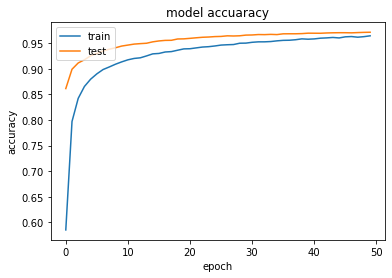

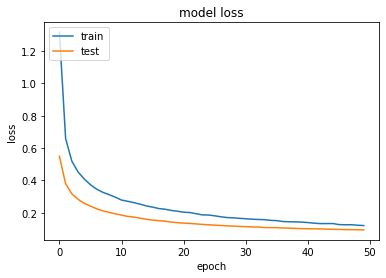

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history["accuracy"])
plt.plot(training.history["val_accuracy"])
plt.title("model accuaracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.title("model loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [29]:
model_2.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x00000143273E8490>>

In [30]:
model_2.weights

[<tf.Variable 'dense_layer_1/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.03896888, -0.01583049,  0.06972631, ..., -0.02331994,
         -0.00039278,  0.00684255],
        [-0.07786425, -0.03177633,  0.02876096, ...,  0.05039438,
         -0.03164833, -0.04297904],
        [-0.03282193,  0.05948376, -0.0299189 , ...,  0.06050371,
          0.02411256,  0.0306415 ],
        ...,
        [ 0.05552394, -0.06585708,  0.02344523, ...,  0.07957887,
         -0.00293813, -0.07637136],
        [-0.07998108,  0.00788949, -0.06704175, ...,  0.01572359,
         -0.04917525, -0.06237323],
        [ 0.06309027,  0.05388128,  0.07339712, ...,  0.06754833,
          0.06162892,  0.01742288]], dtype=float32)>,
 <tf.Variable 'dense_layer_1/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.06738524,  0.00293756, -0.09070731, -0.02217973, -0.05353959,
        -0.00163812,  0.03535212, -0.15456006, -0.01147199, -0.04702369,
         0.10551337,  0.02339045, -0.06657968, -0.01496122,  

In [31]:
model_2.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_1_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_1',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True

In [34]:
model_2.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [35]:
training=model_2.fit(X_train,Y_train,batch_size=64,epochs=20,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 0.0856 - val_accuracy: 0.9789
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0511 - accuracy: 0.9834 - val_loss: 0.0839 - val_accuracy: 0.9787
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0452 - accuracy: 0.9851 - val_loss: 0.0865 - val_accuracy: 0.9796
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0475 - accuracy: 0.9848 - val_loss: 0.0854 - val_accuracy: 0.9788
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.0830 - val_accuracy: 0.9792
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0442 - accuracy: 0.9852 - val_loss: 0.0854 - val_accuracy: 0.9783
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0452 - accuracy: 0.9853 - val_loss: 0.0852 - val_accuracy: 0.9793
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


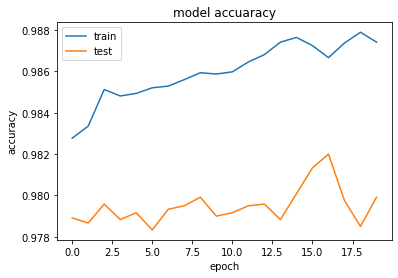

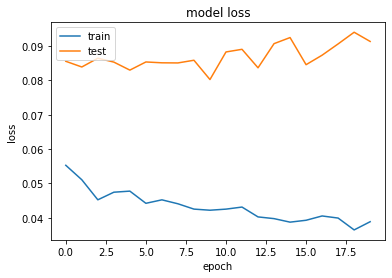

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history["accuracy"])
plt.plot(training.history["val_accuracy"])
plt.title("model accuaracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.title("model loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()